In [2]:
graph={
    'A':['B','C'],
    'B':['E','F'],
    'C':['D','H'],
    'E':[],
    'F':[],
    'D':[],
    'H':[]
}


visited=[]
queue = []

def BFS(graph,visited,node):
    visited.append(node)
    queue.append(node)
    
    while queue:
        m=queue.pop(0)
        print(m,end="->")
        
        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    print('end')
print('BFS:')
BFS(graph,visited,'A')

BFS:
A->B->C->E->F->D->H->end


In [3]:
visited=[]
stack=[]

def DFS(graph,visited,node):
    visited.append(node)
    stack.append(node)
    
    while stack:
        m=stack.pop()
        print(m,end='->')
        
        for neighbour in reversed(graph[m]):
            if neighbour not in visited:
                visited.append(neighbour)
                stack.append(neighbour)
    print('end')
print('DFS')
DFS(graph,visited,'A')

DFS
A->B->E->F->C->D->H->end


In [5]:
visited=[]
stack=[]

def DLS(graph,visited,node,depth_limit):
    stack.append((node,0))
    while stack:
        m,depth=stack.pop(0)
        print(m,end="->")
        if depth < depth_limit:
            for neighbour in graph[m]:
                if neighbour not in visited:
                    stack.append((neighbour,depth+1))
                    visited.append(neighbour)
    print('end')

print("DLS")
DLS(graph,visited,'A',1)

DLS
A->B->C->end


In [12]:
graph={
    'A':['B','C'],
    'B':['E','F'],
    'C':['D','H'],
    'E':[],
    'F':[],
    'D':[],
    'H':[]
}


visited=[]
queue = []

def BFS(graph,visited,node,goal):
    visited.append(node)
    queue.append(node)
    
    while queue:
        
        m=queue.pop(0)
        print(m,end="->")
        
        if m==goal:
          print('Goal Reached')
          break
        
        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    #print('end')
print('BFS with Goal:')
BFS(graph,visited,'A','C')

BFS with Goal:
A->B->C->Goal Reached


In [18]:
def GBFS(graph, start, goal):
    visited = set()  
    queue = [(start, 0)] 
    
    while queue:
        node, _ = queue.pop(0)
        
        if node == goal:
            print(node, end="-> end")
            return True
        
        if node not in visited:
            print(node, end="->")
            visited.add(node)

            if goal in graph[node]:
                print(goal, end="-> end")
                return None
            
            sorted_neighbors = sorted(graph[node].items(), key=lambda x: x[1])
            
            for neighbor, weight in sorted_neighbors:
                if neighbor not in visited:
                    queue.append((neighbor, weight))
    
    print("Goal not found")
    return False

print("GBFS:")
GBFS(graph, 'A', 'D')


GBFS:
A->B->C->D-> end

In [24]:
import heapq

class Graph:
    def __init__(self):
        self.graph = {}
    
    def add_edge(self, u, v, w):
        if u not in self.graph:
            self.graph[u] = []
        self.graph[u].append((v, w))
    
    def greedy_best_first_search(self, start, goal):
        visited = set()
        heap = [(0, start)]
        
        while heap:
            (cost, node) = heapq.heappop(heap)
            
            if node not in visited:
                visited.add(node)
                
                if node == goal:
                    return True
                
                for (neighbor, weight) in self.graph.get(node, []):
                    heapq.heappush(heap, (weight, neighbor))
                    
        return False
    
    def a_star_search(self, start, goal, heuristic):
        visited = set()
        heap = [(0 + heuristic[start], 0, start)]
        
        while heap:
            (_, cost, node) = heapq.heappop(heap)
            
            if node not in visited:
                visited.add(node)
                
                if node == goal:
                    
                    return True
                
                for (neighbor, weight) in self.graph.get(node, []):
                    heapq.heappush(heap, (cost + weight + heuristic[neighbor], cost + weight, neighbor))
                    
        return False

graph = Graph()
graph.add_edge('A', 'B', 5)
graph.add_edge('A', 'C', 3)
graph.add_edge('B', 'D', 2)
graph.add_edge('C', 'E', 6)
graph.add_edge('D', 'F', 4)
graph.add_edge('E', 'F', 1)

heuristic = {'A': 7, 'B': 6, 'C': 4, 'D': 2, 'E': 4, 'F': 0}

print("Greedy Best-First Search:")
print(graph.greedy_best_first_search('A', 'F'))

print("A* Search:")
print(graph.a_star_search('A', 'F', heuristic))


Greedy Best-First Search:
True
A* Search:
True


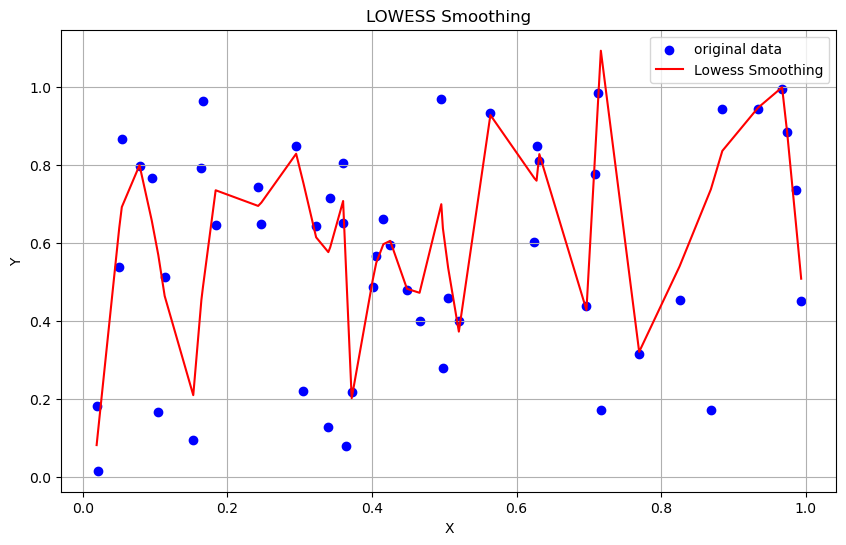

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

x = np.random.rand(50)
y = np.random.rand(50)

smoothed = lowess(y, x, frac=0.1)
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='original data', color='blue')
plt.plot(smoothed[:,0], smoothed[:,1], color='red', label="Lowess Smoothing")
plt.title("LOWESS Smoothing")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = np.random.rand(100, 2)
Y = np.random.randint(0, 2, 100)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

rf_classifier.fit(X_train, Y_train)


y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 50.00%


In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

x= np.random.rand(100,2)
y= np.random.randint(0,2,100)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train,Y_train)

y_pred=mlp_classifier.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 45.00%


In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

x=np.random.rand(100,2)
y=np.random.randint(0,2,100)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=32)

naive = GaussianNB()
naive.fit(X_train,Y_train)

y_pred = naive.predict(X_test)

accuracy = accuracy_score(Y_test,y_pred)
print(accuracy*100)

30.0


In [ ]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Generate random data
data = np.random.rand(100, 2)

# Initialize SOM
som = MiniSom(10, 10, 2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
som.train_random(data, 1000)

# Plotting
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T)
plt.show()


C:\Users\jofra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jofra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


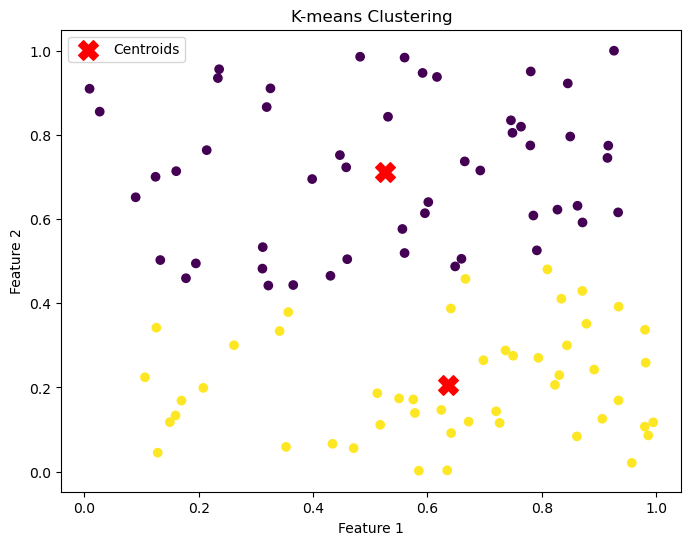

In [37]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = np.random.rand(100, 2)

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


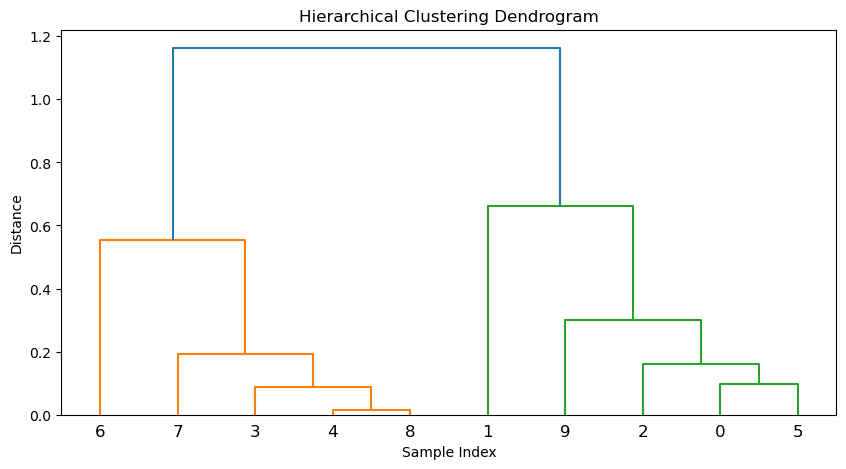

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate random data
X = np.random.rand(10, 2)

# Perform Hierarchical Clustering
Z = linkage(X, method='ward')

# Plotting the Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
